#***Random Forest Regressor Model***

In [1]:
#Importing all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
#Dataset loading
df = pd.read_excel(r"C:\Users\taran\OneDrive\Documents\ML Datasets\Parkinsons_Disease_Dataset.xlsx")
df.head()

,index,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


**Exploratory Data Analysis**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          5875 non-null   int64  
 1   subject#       5875 non-null   int64  
 2   age            5875 non-null   int64  
 3   sex            5875 non-null   int64  
 4   test_time      5875 non-null   float64
 5   motor_UPDRS    5875 non-null   float64
 6   total_UPDRS    5875 non-null   float64
 7   Jitter(%)      5875 non-null   float64
 8   Jitter(Abs)    5875 non-null   float64
 9   Jitter:RAP     5875 non-null   float64
 10  Jitter:PPQ5    5875 non-null   float64
 11  Jitter:DDP     5875 non-null   float64
 12  Shimmer        5875 non-null   float64
 13  Shimmer(dB)    5875 non-null   float64
 14  Shimmer:APQ3   5875 non-null   float64
 15  Shimmer:APQ5   5875 non-null   float64
 16  Shimmer:APQ11  5875 non-null   float64
 17  Shimmer:DDA    5875 non-null   float64
 18  NHR     

In [4]:
df.isnull().sum()

index            0
subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [5]:
df.describe()

,index,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,2937.000000,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,1696.110747,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,0.000000,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,1468.500000,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,2937.000000,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,4405.500000,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,5874.000000,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


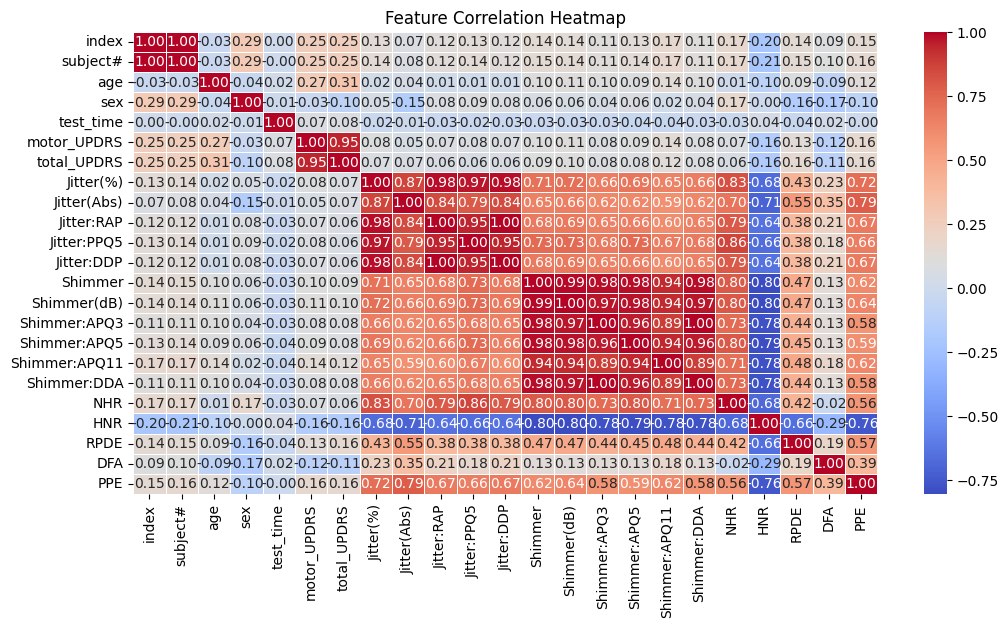

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

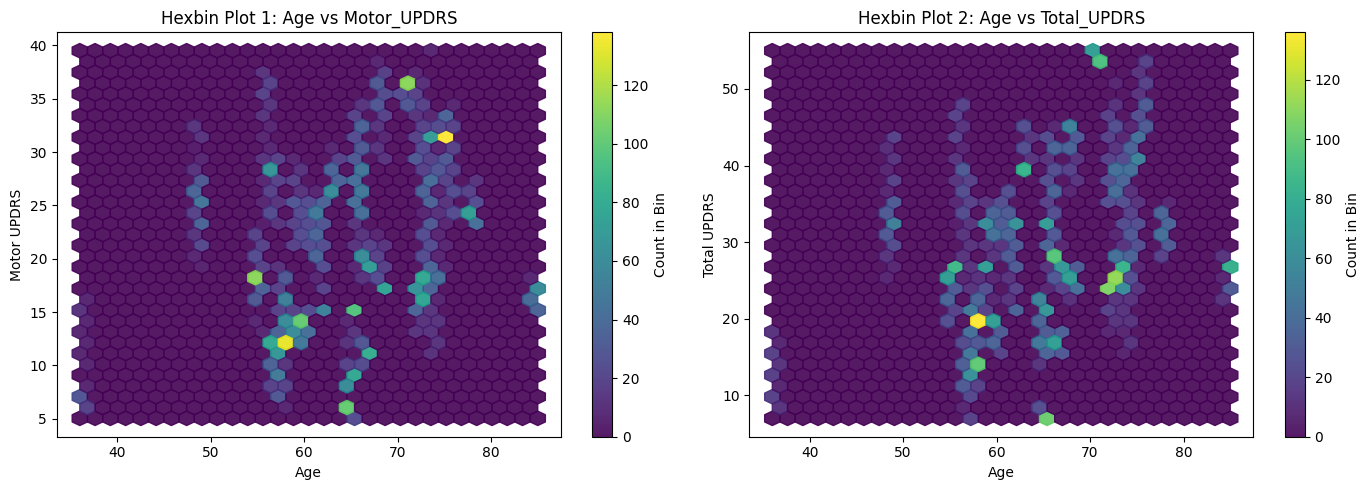

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# First Hexbin Plot
hb1 = axes[0].hexbin(df['age'], df['motor_UPDRS'], gridsize=30, cmap='viridis', alpha=0.9)
axes[0].set_title("Hexbin Plot 1: Age vs Motor_UPDRS")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Motor UPDRS")
fig.colorbar(hb1, ax=axes[0], label="Count in Bin")

# Second Hexbin Plot (Example: Slightly Different Grid Size or Data Subset)
hb2 = axes[1].hexbin(df['age'], df['total_UPDRS'], gridsize=30, cmap='viridis', alpha=0.9)
axes[1].set_title("Hexbin Plot 2: Age vs Total_UPDRS")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Total UPDRS")
fig.colorbar(hb2, ax=axes[1], label="Count in Bin")

# Show plots
plt.tight_layout()
plt.show()

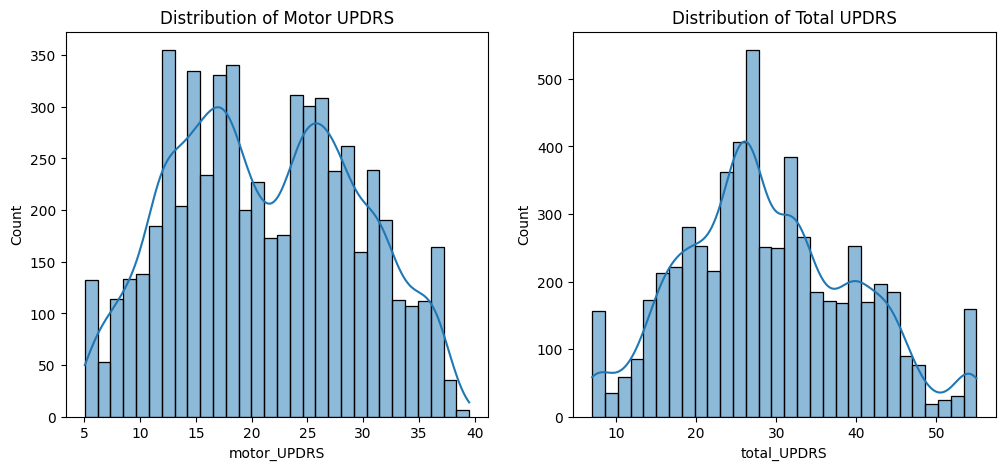

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['motor_UPDRS'], kde=True, bins=30, ax=axes[0])
axes[0].set_title("Distribution of Motor UPDRS")

sns.histplot(df['total_UPDRS'], kde=True, bins=30, ax=axes[1])
axes[1].set_title("Distribution of Total UPDRS")

plt.show()

**Preprocessing**

In [24]:
df = df.drop(columns=['subject#', 'index'])
df.head()

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [25]:
X = df.drop(columns=['motor_UPDRS', 'total_UPDRS'])  # Features
y_motor = df['motor_UPDRS']   # Target 1
y_total = df['total_UPDRS']   # Target 2

In [26]:
#Train-Test-Split
X_train, X_test, y_train_motor, y_test_motor = train_test_split(X, y_motor, test_size=0.2, random_state=42)
X_train, X_test, y_train_total, y_test_total = train_test_split(X, y_total, test_size=0.2, random_state=42)

# Feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Training the Model**

In [27]:
# Initialize and train the model for motor_UPDRS
rf_motor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_motor.fit(X_train_scaled, y_train_motor)

# Initialize and train the model for total_UPDRS
rf_total = RandomForestRegressor(n_estimators=100, random_state=42)
rf_total.fit(X_train_scaled, y_train_total)

RandomForestRegressor(random_state=42)

**Model Evaluation**

In [28]:
# Predict values
y_pred_motor = rf_motor.predict(X_test_scaled)
y_pred_total = rf_total.predict(X_test_scaled)

# Define evaluation function
def evaluate(y_true, y_pred, model_name):
    print(f"Model Evaluation - {model_name}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred):.4f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print("-" * 50)

# Evaluate both models
evaluate(y_test_motor, y_pred_motor, "Motor UPDRS")
evaluate(y_test_total, y_pred_total, "Total UPDRS")

Model Evaluation - Motor UPDRS
Mean Absolute Error (MAE): 0.6209
Mean Squared Error (MSE): 1.7475
Root Mean Squared Error (RMSE): 1.3219
R² Score: 0.9726
--------------------------------------------------
Model Evaluation - Total UPDRS
Mean Absolute Error (MAE): 0.7179
Mean Squared Error (MSE): 2.5827
Root Mean Squared Error (RMSE): 1.6071
R² Score: 0.9767
--------------------------------------------------


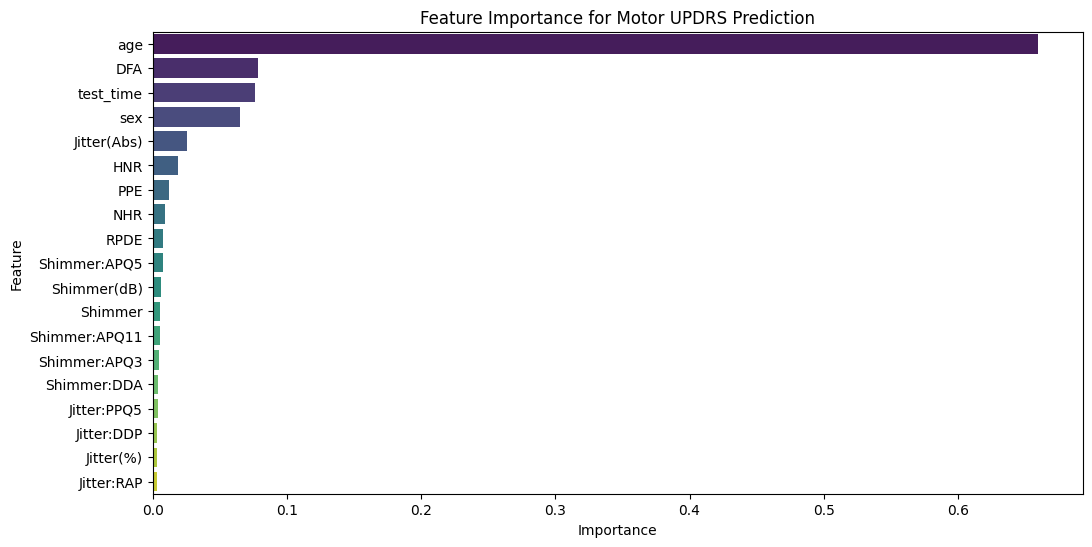

In [29]:
# Get feature importance
feature_importance_motor = pd.DataFrame({'Feature': X.columns, 'Importance': rf_motor.feature_importances_})
feature_importance_motor = feature_importance_motor.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_motor['Importance'], hue=feature_importance_motor['Feature'], y=feature_importance_motor['Feature'], palette="viridis")
plt.title("Feature Importance for Motor UPDRS Prediction")
plt.show()


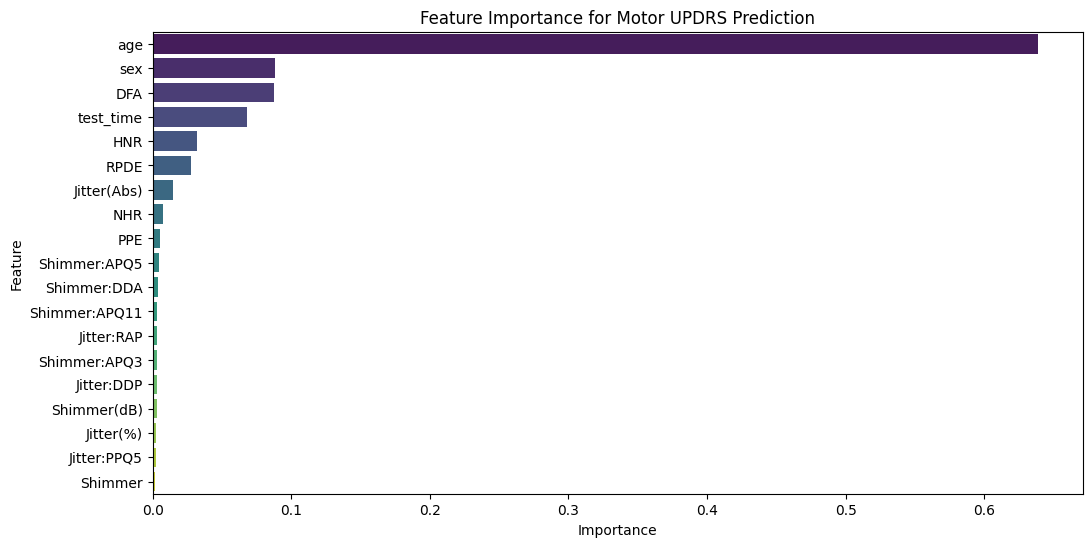

In [30]:
# Get feature importance
feature_importance_total = pd.DataFrame({'Feature': X.columns, 'Importance': rf_total.feature_importances_})
feature_importance_total = feature_importance_total.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_total['Importance'], hue=feature_importance_total['Feature'], y=feature_importance_total['Feature'], palette="viridis")
plt.title("Feature Importance for Motor UPDRS Prediction")
plt.show()

In [31]:
# Concatenate both DataFrames side by side
feature_importance_combined = pd.concat([feature_importance_total, feature_importance_motor], axis=1)

# Rename the columns to differentiate them
feature_importance_combined.columns = ["Feature_Total", "Importance_Total", "Feature_Motor", "Importance_Motor"]

# Print the result
print(feature_importance_combined)
print('-'*70)

    Feature_Total  Importance_Total  Feature_Motor  Importance_Motor
0             age          0.639214            age          0.660087
1             sex          0.088545            sex          0.064824
17            DFA          0.087606            DFA          0.078732
2       test_time          0.067831      test_time          0.075974
15            HNR          0.032156            HNR          0.019123
16           RPDE          0.027745           RPDE          0.007725
4     Jitter(Abs)          0.014913    Jitter(Abs)          0.025811
14            NHR          0.007215            NHR          0.009121
18            PPE          0.004878            PPE          0.012421
11   Shimmer:APQ5          0.004374   Shimmer:APQ5          0.007683
13    Shimmer:DDA          0.003793    Shimmer:DDA          0.004263
12  Shimmer:APQ11          0.003172  Shimmer:APQ11          0.005101
5      Jitter:RAP          0.003148     Jitter:RAP          0.002788
10   Shimmer:APQ3          0.00308

**Feature Selection**

In [32]:
top_n = int(len(feature_importance_motor) * 0.7)  # 70% of total features
selected_features = feature_importance_motor.nlargest(top_n, 'Importance')
print(selected_features)

          Feature  Importance
0             age    0.660087
17            DFA    0.078732
2       test_time    0.075974
1             sex    0.064824
4     Jitter(Abs)    0.025811
15            HNR    0.019123
18            PPE    0.012421
14            NHR    0.009121
16           RPDE    0.007725
11   Shimmer:APQ5    0.007683
9     Shimmer(dB)    0.006217
8         Shimmer    0.005575
12  Shimmer:APQ11    0.005101


In [33]:
X_train_selected = X_train[selected_features['Feature']]
X_test_selected = X_test[selected_features['Feature']]
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [39]:
# Initialize and train the model for motor_UPDRS
rf_motor_new = RandomForestRegressor(n_estimators=100, random_state=42)
rf_motor_new.fit(X_train_scaled, y_train_motor)

# Initialize and train the model for total_UPDRS
rf_total_new = RandomForestRegressor(n_estimators=100, random_state=42)
rf_total_new.fit(X_train_scaled, y_train_total)

RandomForestRegressor(random_state=42)

In [40]:
y_pred_motor = rf_motor_new.predict(X_test_scaled)
y_pred_total = rf_total_new.predict(X_test_scaled)

# Define evaluation function
def evaluate(y_true, y_pred, model_name):
    print(f"Model Evaluation - {model_name}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred):.4f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print("-" * 50)

# Evaluate both models
evaluate(y_test_motor, y_pred_motor, "Motor UPDRS")
evaluate(y_test_total, y_pred_total, "Total UPDRS")

Model Evaluation - Motor UPDRS
Mean Absolute Error (MAE): 0.5699
Mean Squared Error (MSE): 1.6516
Root Mean Squared Error (RMSE): 1.2852
R² Score: 0.9741
--------------------------------------------------
Model Evaluation - Total UPDRS
Mean Absolute Error (MAE): 0.6791
Mean Squared Error (MSE): 2.4926
Root Mean Squared Error (RMSE): 1.5788
R² Score: 0.9775
--------------------------------------------------


**Saving the Model**

In [41]:
import pickle

# Save the first model
with open("rf_motor_new.pkl", "wb") as file:
    pickle.dump(rf_motor_new, file)

# Save the second model
with open("rf_total_new.pkl", "wb") as file:
    pickle.dump(rf_total_new, file)

print("Both models saved successfully!")

Both models saved successfully!


**Testing a custom input**

In [44]:
new_input = np.array([[66, 0.652910, 93.633000, 1.000000, 0.000037, 22.010000, 0.312000, 0.019230, 0.601200, 0.016200, 0.264600, 0.028140, 0.023780]])
new_input_df = pd.DataFrame(new_input, columns=selected_features['Feature'])
scaled_input = scaler.transform(new_input_df)
motor_predict = rf_motor_new.predict(scaled_input)
total_predict = rf_total_new.predict(scaled_input)
print(f"Motor UPDRS: {motor_predict}")
print(f"Total UPDRS: {total_predict}")

Motor UPDRS: [28.64998]
Total UPDRS: [33.13163]
